# 📊 Comparación de rendimiento: VM vs Docker

📊 Promedio VM: 9.70 ms
🐳 Promedio Docker: 2.80 ms


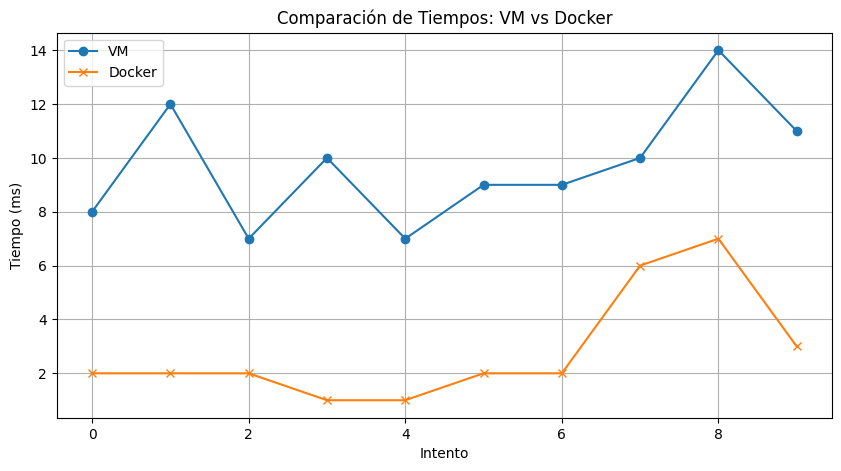

In [2]:
import matplotlib.pyplot as plt
import os
import re
from statistics import mean

def leer_tiempos(path):
    tiempos = []
    with open(path) as f:
        for linea in f:
            match = re.search(r"Intento \d+: (\d+) ms", linea)
            if match:
                tiempos.append(int(match.group(1)))
    return tiempos

# Leer archivos
vm_tiempos = leer_tiempos("../results/resultados_vm19.txt")
docker_tiempos = leer_tiempos("../results/resultados_docker19.txt")

# Promedios
prom_vm = mean(vm_tiempos)
prom_docker = mean(docker_tiempos)

print(f"📊 Promedio VM: {prom_vm:.2f} ms")
print(f"🐳 Promedio Docker: {prom_docker:.2f} ms")

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(vm_tiempos, label="VM", marker="o")
plt.plot(docker_tiempos, label="Docker", marker="x")
plt.title("Comparación de Tiempos: VM vs Docker")
plt.xlabel("Intento")
plt.ylabel("Tiempo (ms)")
plt.legend()
plt.grid(True)
plt.show()


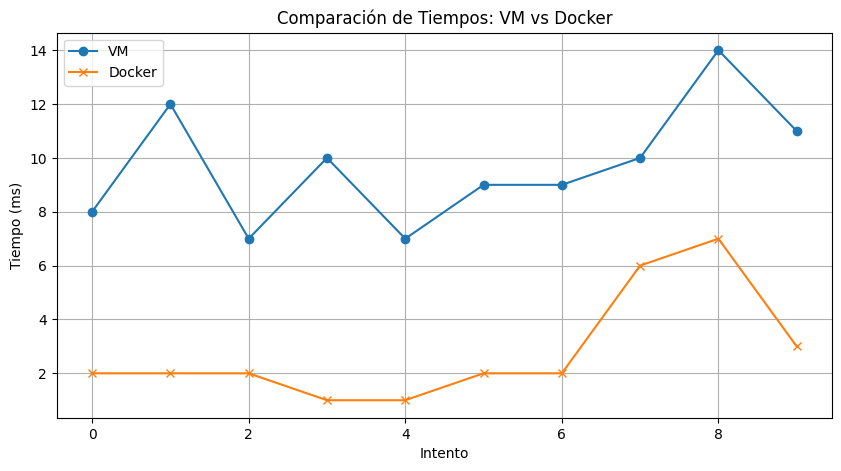

✅ Gráfica guardada como 'comparativa.png' en la carpeta results/


In [3]:
# Guardar la gráfica comparativa como imagen PNG
plt.figure(figsize=(10, 5))
plt.plot(vm_tiempos, label="VM", marker="o")
plt.plot(docker_tiempos, label="Docker", marker="x")
plt.title("Comparación de Tiempos: VM vs Docker")
plt.xlabel("Intento")
plt.ylabel("Tiempo (ms)")
plt.legend()
plt.grid(True)

# Guardar en archivo
plt.savefig("../results/comparativa.png")
plt.show()

print("✅ Gráfica guardada como 'comparativa.png' en la carpeta results/")


In [2]:
import requests, time, matplotlib.pyplot as plt, os, re
from statistics import mean

URL = "http://localhost:5000"
IMG_PATH = "../test.jpg"

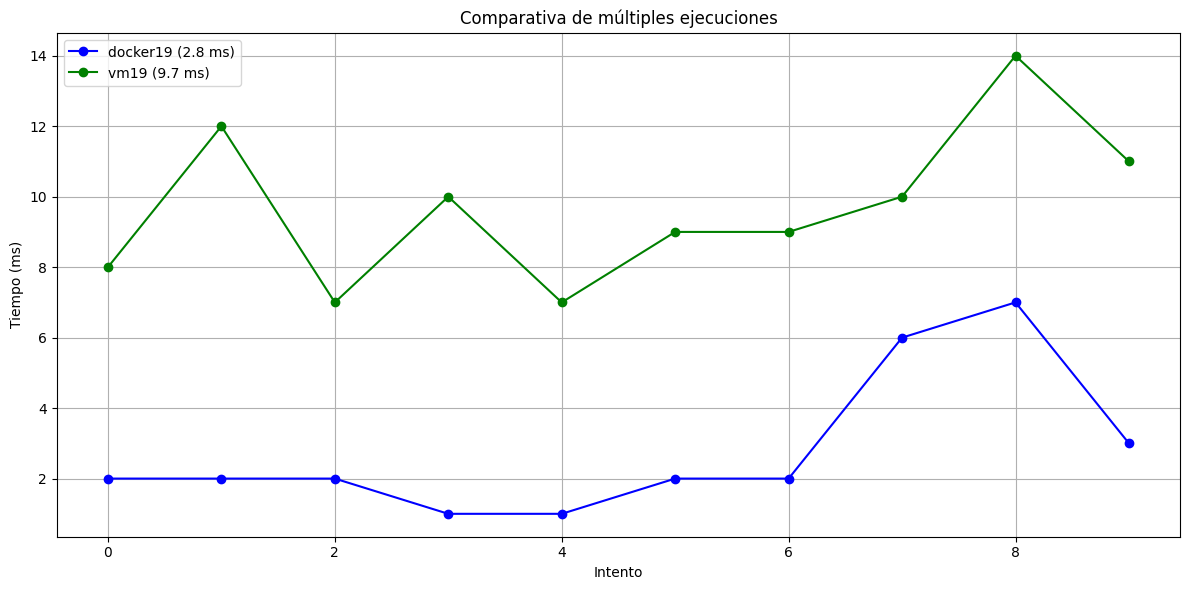


📊 Tabla de promedios:
| Archivo | Tiempo medio (ms) |
|---------|-------------------|
| docker19 | 2.80 |
| vm19 | 9.70 |


In [4]:
import os
import re
import matplotlib.pyplot as plt
from statistics import mean

# Carpeta de resultados
ruta = "../results"
archivos = sorted([f for f in os.listdir(ruta) if f.startswith("resultados_") and f.endswith(".txt")])

promedios = {}
colores = ["blue", "green", "red", "orange", "purple"]

plt.figure(figsize=(12, 6))

for i, archivo in enumerate(archivos):
    tiempos = []
    with open(os.path.join(ruta, archivo)) as f:
        for linea in f:
            match = re.search(r"Intento \d+: (\d+) ms", linea)
            if match:
                tiempos.append(int(match.group(1)))

    if tiempos:
        nombre = archivo.replace("resultados_", "").replace(".txt", "")
        prom = mean(tiempos)
        promedios[nombre] = prom
        plt.plot(tiempos, label=f"{nombre} ({prom:.1f} ms)", marker="o", color=colores[i % len(colores)])

plt.title("Comparativa de múltiples ejecuciones")
plt.xlabel("Intento")
plt.ylabel("Tiempo (ms)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../results/comparativa_multiple.png")
plt.show()

# Mostrar tabla comparativa
print("\n📊 Tabla de promedios:")
print("| Archivo | Tiempo medio (ms) |")
print("|---------|-------------------|")
for nombre, prom in promedios.items():
    print(f"| {nombre} | {prom:.2f} |")


In [3]:
def medir_tiempos(n=10):
    tiempos = []
    with open(IMG_PATH, 'rb') as img:
        for _ in range(n):
            inicio = time.perf_counter()
            requests.post(URL, files={'image': img})
            fin = time.perf_counter()
            tiempos.append((fin - inicio) * 1000)
            img.seek(0)
    return tiempos

tiempos = medir_tiempos()
print("Tiempos (ms):", tiempos)
print("Promedio:", mean(tiempos))

Tiempos (ms): [95.46348499998203, 9.90150799998446, 6.280490999870381, 5.500535999999556, 3.259171000081551, 2.902824000102555, 3.5190280000279017, 3.742294999938167, 2.8919209999003215, 5.442459999812854]
Promedio: 13.890371899969978


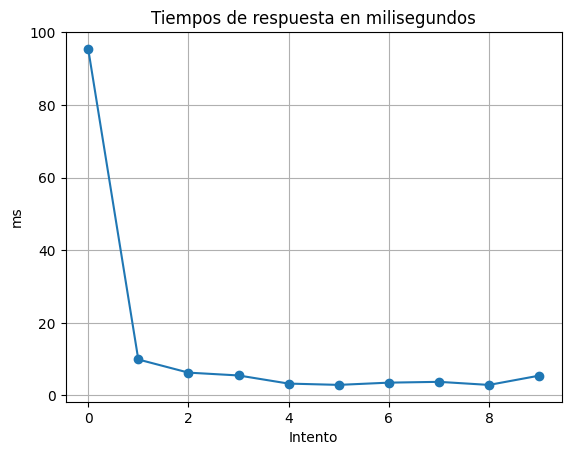

In [4]:
plt.plot(tiempos, marker='o')
plt.title("Tiempos de respuesta en milisegundos")
plt.xlabel("Intento")
plt.ylabel("ms")
plt.grid(True)
plt.show()